# Завдання

Завантажте зображення titanic.jpg, що знаходиться в репозиторії лекції. Застосуйте до нього методи детекції облич Віоли-Джонса та HOG. Оформіть результати детекції в середовищі Jupyter Notebook.

# Розв'язок

In [109]:
import dlib
from imutils import face_utils
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Метод Віоли-Джонса 

<function matplotlib.pyplot.show(close=None, block=None)>

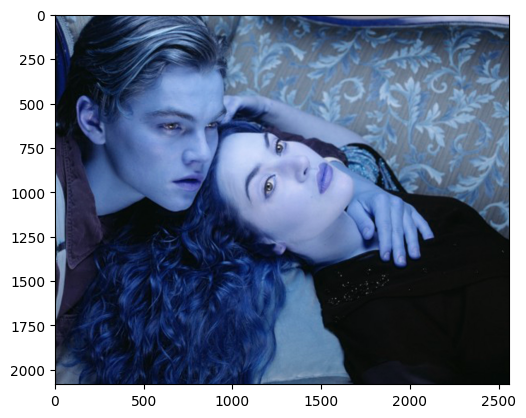

In [110]:
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
img = cv2.imread("/content/titanic.jpg")
plt.imshow(img)
plt.show

In [111]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [112]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [113]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)

<function matplotlib.pyplot.show(close=None, block=None)>

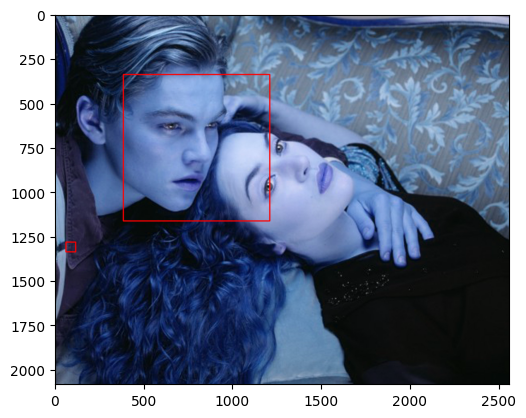

In [114]:
plt.imshow(img)
plt.show

In [115]:
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width/2, height/2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

In [128]:
rotated_image = rotate_image(img, -90)

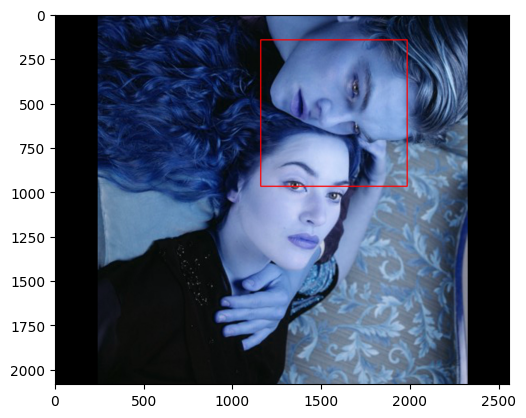

In [129]:
plt.imshow(rotated_image)
plt.show()

In [130]:
for (x, y, w, h) in faces:
    cv2.rectangle(rotated_image, (x, y), (x+w, y+h), (255, 0, 0), 5)

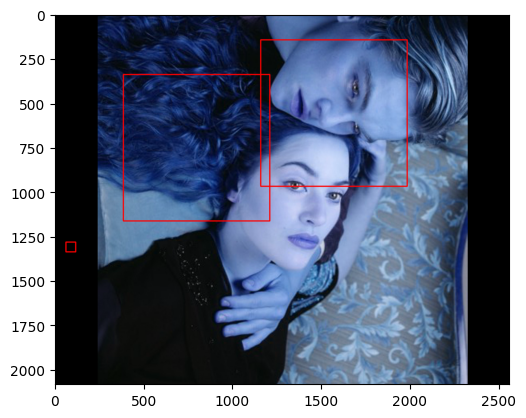

In [131]:
plt.imshow(rotated_image)
plt.show()

### Метод HOG

In [132]:
gray = cv2.imread("/content/titanic.jpg", 0)
im = np.float32(gray) / 255.0
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

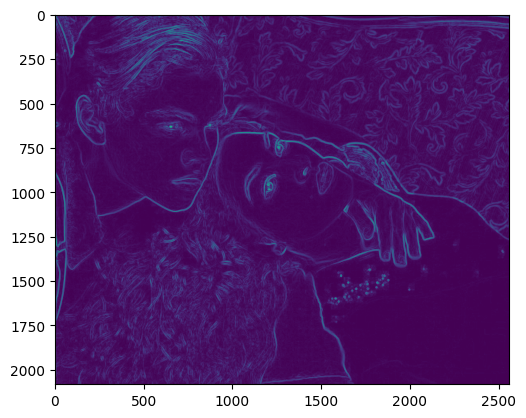

In [133]:
plt.imshow(mag)
plt.show()

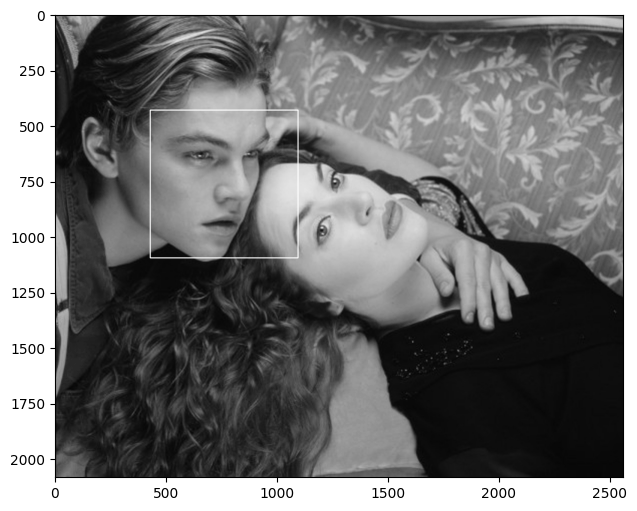

In [127]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(10,6))
plt.imshow(gray, cmap='gray')
plt.show()

In [160]:
rotated_image1 = rotate_image(gray, -90)

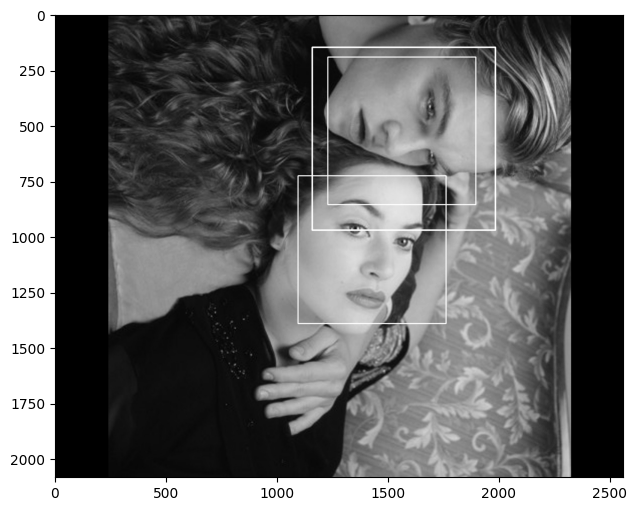

In [161]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(rotated_image1, 1)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(rotated_image1, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(10,6))
plt.imshow(rotated_image1, cmap='gray')
plt.show()

### Таким чином, метод детекції облич HOG продемонстрував кращий результат, виявивши обидва обличчя після розвороту зображення на 90 градусів. При цьому метод Віоли-Джонса виявив тільки одне обличчя після аналогічного розвороту.